<a href="https://colab.research.google.com/github/2303A51303/AIML_2303A51303/blob/main/LabExam_1303_B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SET-22

2303A51303

batch-05


**Q-Prediction of news popularity in social media platforms**

q1. identify the max and min popularities of news among the social media platforms.

Q2.identify the date and time when news popularity was the most.

Q3.predict the social media platform with the most popularity.

Q4.what types of news items is suitable and not suitable for social media.

Q5.does news contribute to increase or decrease of social media popularity.



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt



In [12]:
zip_file_path = '/content/news+popularity+in+multiple+social+media+platforms.zip'
csv_file_name = 'Data/News_Final.csv'

In [13]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(csv_file_name) as csv_file:
        df = pd.read_csv(csv_file)

In [14]:
print(df.columns)

Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn'],
      dtype='object')


In [15]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93239 entries, 0 to 93238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             93239 non-null  float64
 1   Title              93239 non-null  object 
 2   Headline           93224 non-null  object 
 3   Source             92960 non-null  object 
 4   Topic              93239 non-null  object 
 5   PublishDate        93239 non-null  object 
 6   SentimentTitle     93239 non-null  float64
 7   SentimentHeadline  93239 non-null  float64
 8   Facebook           93239 non-null  int64  
 9   GooglePlus         93239 non-null  int64  
 10  LinkedIn           93239 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 7.8+ MB


**Question-1**

In [20]:
df['TotalPopularity'] = df[['Facebook', 'GooglePlus', 'LinkedIn']].sum(axis=1)

In [21]:
max_popularity = df['TotalPopularity'].max()
min_popularity = df['TotalPopularity'].min()

In [22]:
print(f"Max popularity: {max_popularity}")
print(f"Min popularity: {min_popularity}")

Max popularity: 49211
Min popularity: -3


**Question-2**

In [23]:
most_popular_news = df.loc[df['TotalPopularity'].idxmax()]

In [24]:
print(f"Date and time of most popular news: {most_popular_news['PublishDate']}")

Date and time of most popular news: 2016-02-29 07:17:31


**Question-3**

In [25]:
platform_totals = df[['Facebook', 'GooglePlus', 'LinkedIn']].sum()
most_popular_platform = platform_totals.idxmax()

In [26]:
print(f"The social media platform with the most popularity is: {most_popular_platform}")

The social media platform with the most popularity is: Facebook


**Question-4**

In [27]:
topic_popularity = df.groupby('Topic')['TotalPopularity'].mean().sort_values(ascending=False)

In [28]:
print("Most suitable types of news:")
print(topic_popularity.head())

Most suitable types of news:
Topic
obama        297.516812
microsoft     70.064828
economy       57.901527
palestine     50.518037
Name: TotalPopularity, dtype: float64


In [29]:
print("Least suitable types of news:")
print(topic_popularity.tail())

Least suitable types of news:
Topic
obama        297.516812
microsoft     70.064828
economy       57.901527
palestine     50.518037
Name: TotalPopularity, dtype: float64


**Question-5**

In [30]:
correlations = df[['SentimentTitle', 'SentimentHeadline', 'TotalPopularity']].corr()

In [31]:
print("Correlation of sentiments with popularity:")
print(correlations['TotalPopularity'])

Correlation of sentiments with popularity:
SentimentTitle      -0.003069
SentimentHeadline    0.001864
TotalPopularity      1.000000
Name: TotalPopularity, dtype: float64


**Visualizing**

In [35]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [36]:
print("Numeric columns for correlation:", numeric_df.columns)

Numeric columns for correlation: Index(['IDLink', 'SentimentTitle', 'SentimentHeadline', 'Facebook',
       'GooglePlus', 'LinkedIn', 'TotalPopularity'],
      dtype='object')


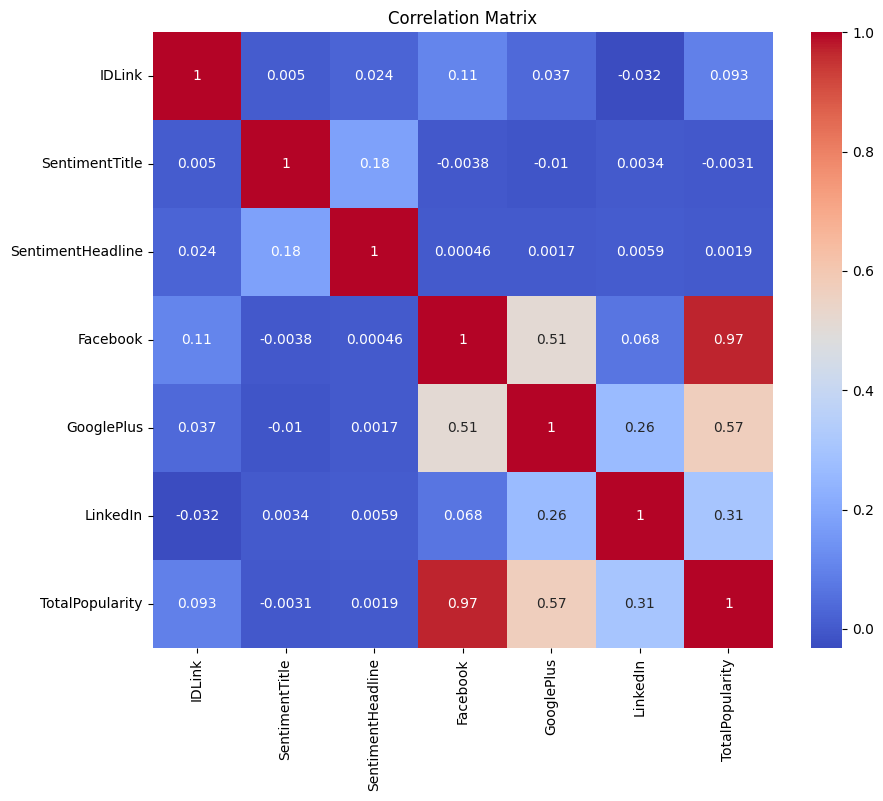

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()